# S12_T01_Machine_Learning_avançat


### Ex1: Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest

In [71]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

#he triat un dataset de Kaggle "Gender Development Index 2019"

El GDI mesura les bretxes de gènere en els assoliments del desenvolupament humà tenint en compte les disparitats entre dones i homes en tres dimensions bàsiques del desenvolupament humà: salut, coneixements i nivells de vida utilitzant els mateixos indicadors de components que l'HDI

El GDI és la proporció dels HDI calculada per separat per a dones i homes utilitzant la mateixa metodologia que en l'HDI. És una mesura directa de la bretxa de gènere que mostra l'HDI femení com a percentatge de l'HDI masculí

Dades de les Columnes:

* HDI(Human Development Index)
* GDI (Gender Development Index)
* Lif_Expec (Life Expectancy at Birth)
* Expec_Yrs_School(Expected Years of Schooling)
* GNI_PC(Gross National Income per Capita)

In [2]:
#import dataset
pd.set_option("display.max_columns", None)
data_frame = pd.read_csv("GDI.csv")

In [3]:
data_frame.head(10)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
0,NaN,NaN,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
6,6.0,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,"45,277","65,599"
7,7.0,Sweden,0.983,1,0.936,0.953,84.6,81.0,20.4,18.6,12.7,12.4,"47,709","61,287"
8,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
9,8.0,Netherlands,0.966,2,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"


In [4]:
#treiem la fila 0, que no ens interessa per res
data_frame = data_frame.drop(0)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 1 to 189
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HDI Rank                    189 non-null    float64
 1   Country                     189 non-null    object 
 2   GDI_Value                   189 non-null    object 
 3   GDI_Group                   189 non-null    object 
 4   HDI_Female                  189 non-null    object 
 5   HDI_Male                    189 non-null    object 
 6   Lif_Expec_Female            189 non-null    object 
 7   Lif_Excep_Male              189 non-null    object 
 8   Excep_Yrs_Schooling_Female  189 non-null    object 
 9   Excep_Yrs_Schooling_Male    189 non-null    object 
 10  Mean_Yrs_Schooling_Female   189 non-null    object 
 11  Mean_Yrs_Schooling_Male     189 non-null    object 
 12  GNI_PC_Female               189 non-null    object 
 13  GNI_PC_Male                 189 non

In [6]:
#observem que tenim totes les columnes que són object type, excepte HDI_Rank
#convertim object type a numeric(float type), excepte la columna Country

In [7]:
data_frame.isnull().sum()

HDI Rank                      0
Country                       0
GDI_Value                     0
GDI_Group                     0
HDI_Female                    0
HDI_Male                      0
Lif_Expec_Female              0
Lif_Excep_Male                0
Excep_Yrs_Schooling_Female    0
Excep_Yrs_Schooling_Male      0
Mean_Yrs_Schooling_Female     0
Mean_Yrs_Schooling_Male       0
GNI_PC_Female                 0
GNI_PC_Male                   0
dtype: int64

No tenim cap valor null o nan, però si ens fixem en les dades si que tenim algunes files(d'alguns countries) amb manca de dades i enlloc de la dada tenim ".." Això s'ha vist observant les dades!

In [8]:
data_frame[data_frame["GDI_Group"]== ".."]

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
21,19.0,Liechtenstein,..,..,..,..,..,..,13.8,16.0,..,..,..,..
36,36.0,Andorra,..,..,..,..,..,..,..,..,10.4,10.6,..,..
50,50.0,Palau,..,..,..,..,..,..,16.3,15.3,..,..,..,..
58,58.0,Bahamas,..,..,..,..,76.1,71.7,..,..,11.7,11.4,"27,560","40,295"
67,67.0,Seychelles,..,..,..,..,77.4,69.9,15.3,13.1,9.9,10.1,..,..
74,74.0,Grenada,..,..,..,..,75.0,70.1,17.0,16.2,..,..,..,..
76,74.0,Saint Kitts and Nevis,..,..,..,..,..,..,14.0,13.7,..,..,..,..
78,78.0,Antigua and Barbuda,..,..,..,..,78.1,75.9,13.2,12.1,..,..,..,..
93,93.0,Fiji,..,..,..,..,69.3,65.7,..,..,11.0,10.8,"8,317","17,577"
94,94.0,Dominica,..,..,..,..,..,..,..,..,..,..,..,..


Observem que totes les files que tenen manca de dades, no ens serveixen de res, ja que en les columnes que si que hi ha alguna dada, ens donen poca o gens informació sobre la bretxa de gènere ni el desenvolupament... Per tant, podem eliminar aquestes files i seguir endavant.De fet, tampoc ens donen gaire informació en aquest dataset, així que tampoc podem omplir aquests valors amb cap dada similar!

In [9]:
data_frame = data_frame[data_frame["GDI_Group"]!=".."]

In [10]:
data_frame.head(10)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,"58,548","74,280"
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,"55,540","81,401"
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,"57,840","81,137"
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,"45,961","82,993"
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,"46,413","62,883"
6,6.0,Germany,0.972,2,0.933,0.960,83.7,78.9,16.9,17.0,13.9,14.4,"45,277","65,599"
7,7.0,Sweden,0.983,1,0.936,0.953,84.6,81.0,20.4,18.6,12.7,12.4,"47,709","61,287"
8,8.0,Australia,0.976,1,0.932,0.955,85.4,81.5,22.4,21.5,12.8,12.7,"39,287","56,954"
9,8.0,Netherlands,0.966,2,0.926,0.960,84.0,80.6,18.8,18.2,12.2,12.7,"46,815","68,685"
10,10.0,Denmark,0.983,1,0.931,0.948,82.9,78.9,19.6,18.3,12.8,12.4,"49,296","68,134"


In [11]:
#eliminem la columna numèrica, i tb la de Country q es un String 
columns = data_frame.columns
columns = columns.drop(['HDI Rank', 'Country'])

pd.set_option("display.max_rows", None)

data_frame[data_frame[columns]== ".."]

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#ara ja hem eliminat tots els valors "..", i ja podem treballar bé amb les dades
#quan intentem passar a numeric, ens dona un error ValueError, pq hi ha comma en la unitat de mil
#si ens fixem en les dades, observem que just tenim aquest cas en les columnes de GNI_PC_Female i GNI_PC_Male
#anem a arreglar-ho per poder treure l'error q ens dona al passar valors a numeric

In [13]:
remove_comma = lambda a:a.replace(',','')

In [14]:
data_frame['GNI_PC_Female'] = data_frame['GNI_PC_Female'].apply(remove_comma)
data_frame['GNI_PC_Male'] = data_frame['GNI_PC_Male'].apply(remove_comma)

In [15]:
#ara ja podem convertir a num
data_frame[columns] = data_frame[columns].apply(pd.to_numeric)

In [16]:
data_frame.describe()

,HDI Rank,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,93.113772,0.938994,2.562874,0.702683,0.742186,75.360479,70.508383,13.601198,13.377246,8.467665,9.113174,14933.550898,25310.389222
std,55.662107,0.074559,1.588911,0.165867,0.143194,7.785706,7.403316,3.335985,2.626617,3.435030,2.828758,15626.190470,24320.280198
min,1.000000,0.488000,1.000000,0.270000,0.432000,55.500000,51.100000,3.500000,5.900000,1.100000,2.300000,186.000000,640.000000
25%,44.000000,0.908500,1.000000,0.577000,0.621500,69.800000,65.800000,11.250000,11.650000,5.900000,6.700000,2972.000000,6439.000000
50%,92.000000,0.965000,2.000000,0.730000,0.760000,77.600000,71.300000,14.000000,13.400000,8.900000,9.200000,8855.000000,17370.000000
75%,141.500000,0.986000,4.000000,0.831500,0.848500,80.900000,75.900000,15.800000,15.100000,11.250000,11.600000,23912.500000,37141.500000
max,189.000000,1.036000,5.000000,0.949000,0.965000,87.700000,82.000000,22.400000,21.500000,13.900000,14.400000,71387.000000,107833.000000


In [17]:
data_frame.shape

(167, 14)

In [18]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 1 to 189
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HDI Rank                    167 non-null    float64
 1   Country                     167 non-null    object 
 2   GDI_Value                   167 non-null    float64
 3   GDI_Group                   167 non-null    int64  
 4   HDI_Female                  167 non-null    float64
 5   HDI_Male                    167 non-null    float64
 6   Lif_Expec_Female            167 non-null    float64
 7   Lif_Excep_Male              167 non-null    float64
 8   Excep_Yrs_Schooling_Female  167 non-null    float64
 9   Excep_Yrs_Schooling_Male    167 non-null    float64
 10  Mean_Yrs_Schooling_Female   167 non-null    float64
 11  Mean_Yrs_Schooling_Male     167 non-null    float64
 12  GNI_PC_Female               167 non-null    int64  
 13  GNI_PC_Male                 167 non

In [19]:
#convertim la columna "Country" de categorical variable a dummy variable
dummy_Country = pd.get_dummies(data_frame["Country"])

In [20]:
data_frame = pd.concat([data_frame, dummy_Country], axis=1)

In [21]:
data_frame.head(10)

,HDI Rank,Country,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Congo (Democratic Republic of the),Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Eswatini (Kingdom of),Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Honduras,"Hong Kong, China (SAR)",Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea (Republic of),Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova (Republic of),Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,"Palestine, State of",Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russian Federation,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania (United Republic of),Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
1,1.0,Norway,0.990,1,0.949,0.959,84.4,80.4,18.8,17.4,13.0,12.8,58548,74280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,Ireland,0.981,1,0.943,0.961,83.9,80.7,18.8,18.6,12.9,12.4,55540,81401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,Switzerland,0.968,2,0.934,0.965,85.6,81.9,16.2,16.4,12.7,13.6,57840,81137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,"Hong Kong, China (SAR)",0.972,2,0.933,0.959,87.7,82.0,17.1,16.8,11.9,12.7,45961,82993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,4.0,Iceland,0.969,2,0.933,0.963,84.5,81.5,20.2,18.0,12.6,13.0,46413,62883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [22]:
data_frame.describe()

,HDI Rank,GDI_Value,GDI_Group,HDI_Female,HDI_Male,Lif_Expec_Female,Lif_Excep_Male,Excep_Yrs_Schooling_Female,Excep_Yrs_Schooling_Male,Mean_Yrs_Schooling_Female,Mean_Yrs_Schooling_Male,GNI_PC_Female,GNI_PC_Male,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,Congo (Democratic Republic of the),Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Eswatini (Kingdom of),Ethiopia,Finland,France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Honduras,"Hong Kong, China (SAR)",Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Korea (Republic of),Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,Moldova (Republic of),Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,"Palestine, State of",Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russian Federation,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Tanzania (United Republic of),Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,93.113772,0.938994,2.562874,0.70268

In [23]:
data_frame.shape

(167, 181)

In [24]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 1 to 189
Columns: 181 entries, HDI Rank to Zimbabwe
dtypes: float64(10), int64(3), object(1), uint8(167)
memory usage: 46.8+ KB


In [25]:
#Els models d'aprenentatge automàtic només poden funcionar amb valors numèrics i sense nan o null values
#Utilitzarem StandardScaler, que resta la mitjana de cada característica i després escala a la variància de la unitat
#ara ja tenim tot arreglat! anem a fer pipeline (aplicant StandardScaler and Random Forest Algorithm) i gridsearch

In [26]:
#primer farem split train-test de les dades

X = data_frame.drop(["HDI Rank", "Country"], axis=1)
y = data_frame["HDI Rank"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=8)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125, 179)
(42, 179)
(125,)
(42,)


In [50]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV 
#definim pipeline (usem Standard Scaler i RandomForestabs)
pipeline_RF = Pipeline([('scl', StandardScaler()),('clf', RandomForestClassifier(random_state=42))])

In [51]:
#ajustem amb train dades
pipeline_RF.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('clf', RandomForestClassifier(random_state=42))])

In [69]:
# prediccció amb train i amb test
predict_train = pipeline_RF.predict(X_train)
y_pred = pipeline_RF.predict(X_test)

In [72]:
print(metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       1.0
         2.0       0.00      0.00      0.00       1.0
         4.0       0.00      0.00      0.00       2.0
         8.0       0.00      0.00      0.00       0.0
        10.0       0.00      0.00      0.00       0.0
        11.0       0.00      0.00      0.00       0.0
        18.0       0.00      0.00      0.00       1.0
        22.0       0.00      0.00      0.00       0.0
        23.0       0.00      0.00      0.00       0.0
        25.0       0.00      0.00      0.00       1.0
        26.0       0.00      0.00      0.00       0.0
        27.0       0.00      0.00      0.00       1.0
        28.0       0.00      0.00      0.00       1.0
        29.0       0.00      0.00      0.00       1.0
        32.0       0.00      0.0

C:\Users\Beth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beth\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [73]:
# keys and vaules for classifier parameters
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
# keys and vaules for pipeline parameters
pipeline_RF.get_params()

{'memory': None,
 'steps': [('scl', StandardScaler()),
  ('clf', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'scl': StandardScaler(),
 'clf': RandomForestClassifier(random_state=42),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'auto',
 'clf__max_leaf_nodes': None,
 'clf__max_samples': None,
 'clf__min_impurity_decrease': 0.0,
 'clf__min_impurity_split': None,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__min_weight_fraction_leaf': 0.0,
 'clf__n_estimators': 100,
 'clf__n_jobs': None,
 'clf__oob_score': False,
 'clf__random_state': 42,
 'clf__verbose': 0,
 'clf__warm_start': False}

Em dona una matriu de confusió de tot zeros, no hauria de donar així, però no tinc temps per esbrinar on és el problema. Per tant, aplicaré el mètode Random Forest sense pipeline a veure què obtinc.

In [63]:
RF = RandomForestClassifier(random_state=42)

In [64]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

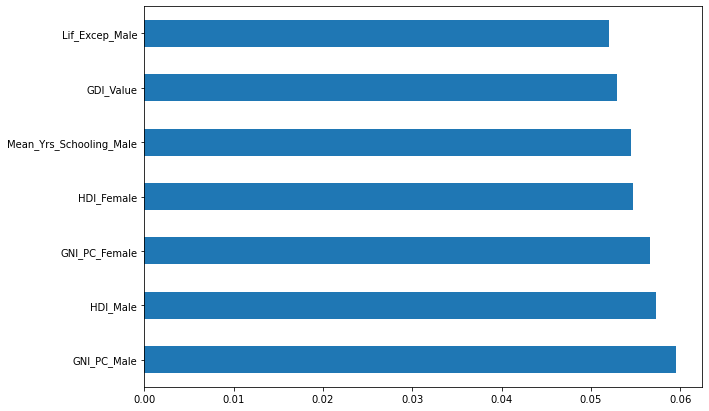

In [68]:
#Feature Importance: mirem p. ex. les 7 features més importants 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(RF.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [76]:
#Ara, entrenem el mateix model de Random Forest, només utilitzant les 7 features, per comprovar si ens afecta molt a la predicció
X_train_7 = X_train[["GNI_PC_Male", "HDI_Male", "GNI_PC_Female", "HDI_Female", "Mean_Yrs_Schooling_Male", "GDI_Value", "Lif_Excep_Male"]]
X_test_7 = X_test[["GNI_PC_Male", "HDI_Male", "GNI_PC_Female", "HDI_Female", "Mean_Yrs_Schooling_Male", "GDI_Value", "Lif_Excep_Male"]]

In [77]:
#tornem a crear el model RFR
RF_7 = RandomForestClassifier(random_state=42)
RF_7.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8,9,10]
grid_params_RF = [{'clf__criterion': ['gini', 'entropy'],'clf__min_samples_leaf': param_range,'clf__max_depth': param_range,'clf__min_samples_split': param_range[1:]}]

In [54]:
#Objecte GridSearchCV amb pipeline i parameter space amb 5 folds cross validation
gridSearch = GridSearchCV(estimator=pipeline_RF, param_grid=grid_params_RF ,scoring="accuracy", cv=10)

In [55]:
#Podem ajustar-ho al conjunt de dades d'entrenament i provar l'algorisme al conjunt de dades de prova. 
#També podem trobar els paràmetres més adequats per a RandomForest
gridSearch.fit(X_train, y_train)

# Pipeline test accuracy
print('Test accuracy: %.3f' % pipeline_RF.score(X_test, y_test))

print ('\nBest params:\n', gridSearch.best_params_)

ValueError: n_splits=10 cannot be greater than the number of members in each class.

### Ex2: Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [10]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Beth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
# Read txt
book_file = open("The-Jungle-Book.txt", "r")
text = book_file.read()

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph

In [13]:
#Word tokenizer breaks text paragraph into words
tokenized_word = word_tokenize(text)
print(tokenized_word)

['The', 'Jungle', 'Book', 'Rudyard', 'Kipling', 'Work', 'reproduced', 'with', 'no', 'editorial', 'responsibility', 'Notice', 'by', 'Luarna', 'Ediciones', 'This', 'book', 'is', 'in', 'the', 'public', 'domain', 'because', 'the', 'copyrights', 'have', 'expired', 'under', 'Spanish', 'law', '.', 'Luarna', 'presents', 'it', 'here', 'as', 'a', 'gift', 'to', 'its', 'cus-', 'tomers', ',', 'while', 'clarifying', 'the', 'following', ':', '1', ')', 'Because', 'this', 'edition', 'has', 'not', 'been', 'super-', 'vised', 'by', 'our', 'editorial', 'deparment', ',', 'we', 'disclaim', 'responsibility', 'for', 'the', 'fidelity', 'of', 'its', 'content', '.', '2', ')', 'Luarna', 'has', 'only', 'adapted', 'the', 'work', 'to', 'make', 'it', 'easily', 'viewable', 'on', 'common', 'six-', 'inch', 'readers', '.', '3', ')', 'To', 'all', 'effects', ',', 'this', 'book', 'must', 'not', 'be', 'con-', 'sidered', 'to', 'have', 'been', 'published', 'by', 'Luarna', '.', 'www.luarna.com', 'Mowgli', "'s", 'Brothers', 'Now'

In [19]:
# Remove punctuation
tokenized_text= [word for word in tokenized_word if word.isalnum()]

print(tokenized_text)


['The', 'Jungle', 'Book', 'Rudyard', 'Kipling', 'Work', 'reproduced', 'with', 'no', 'editorial', 'responsibility', 'Notice', 'by', 'Luarna', 'Ediciones', 'This', 'book', 'is', 'in', 'the', 'public', 'domain', 'because', 'the', 'copyrights', 'have', 'expired', 'under', 'Spanish', 'law', 'Luarna', 'presents', 'it', 'here', 'as', 'a', 'gift', 'to', 'its', 'tomers', 'while', 'clarifying', 'the', 'following', '1', 'Because', 'this', 'edition', 'has', 'not', 'been', 'vised', 'by', 'our', 'editorial', 'deparment', 'we', 'disclaim', 'responsibility', 'for', 'the', 'fidelity', 'of', 'its', 'content', '2', 'Luarna', 'has', 'only', 'adapted', 'the', 'work', 'to', 'make', 'it', 'easily', 'viewable', 'on', 'common', 'inch', 'readers', '3', 'To', 'all', 'effects', 'this', 'book', 'must', 'not', 'be', 'sidered', 'to', 'have', 'been', 'published', 'by', 'Luarna', 'Mowgli', 'Brothers', 'Now', 'Rann', 'the', 'Kite', 'brings', 'home', 'the', 'night', 'That', 'Mang', 'the', 'Bat', 'sets', 'The', 'herds', 

In [21]:
# Frequency Distribution Plot
fdist = FreqDist(tokenized_text)
print(fdist)

<FreqDist with 5051 samples and 50310 outcomes>


In [22]:
fdist.most_common(2)

[('the', 3221), ('and', 2149)]

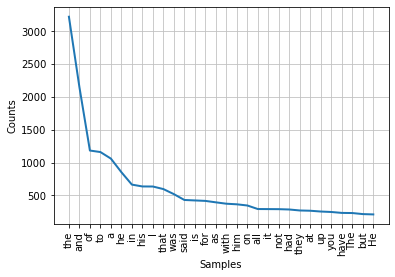

In [23]:
# 30 most common words
fdist.plot(30,cumulative=False)
plt.show()

### Ex3: Treu les stopwords i realitza stemming al teu conjunt de dades

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In [25]:
nltk.download('stopwords')
from nltk.corpus import stopwords
#li hem de dir les stopwords tipiques en anglès, per treure les stopwords li hem de crear primer un llistat de stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Beth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


{'aren', 'shan', 'shouldn', 'more', 'above', 'from', 'have', "didn't", "hasn't", 'isn', 'only', 'couldn', 'ma', 'me', 'further', 'were', 'in', 'over', 'until', 'each', "mightn't", 'he', 'their', "doesn't", 'hasn', 'under', 'why', 'own', 'all', 'any', 'between', 'with', 'its', 'has', 'him', 'myself', 'them', 'once', 'wouldn', 'hers', 'they', 'here', 'again', 'mustn', 'being', 'should', 'just', 'our', "that'll", "won't", 's', "hadn't", 'up', 'your', 'd', "you'll", 'm', 'few', 'theirs', 'because', 'for', 'and', "mustn't", 'before', 'as', "shan't", "don't", 'when', 'while', 'which', "you'd", 'needn', 'doing', 'into', 'hadn', 'through', 'below', 'then', 'some', 'what', 'how', 'now', 'do', 'than', 'nor', 'her', 'mightn', 'those', 'this', 'very', 'i', 'of', 'didn', 'can', 'o', 'other', 'been', 're', 'is', 'haven', 'whom', 'my', 'same', 'y', 'against', 'so', "haven't", 'ain', 'the', 'about', 'you', "you've", "you're", 'by', "weren't", 'herself', 'was', 'after', 'on', 'where', "needn't", 'she',

In [36]:
filtered_text=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_text.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filtered Sentence:",filtered_text)

Tokenized Sentence: ['The', 'Jungle', 'Book', 'Rudyard', 'Kipling', 'Work', 'reproduced', 'with', 'no', 'editorial', 'responsibility', 'Notice', 'by', 'Luarna', 'Ediciones', 'This', 'book', 'is', 'in', 'the', 'public', 'domain', 'because', 'the', 'copyrights', 'have', 'expired', 'under', 'Spanish', 'law', 'Luarna', 'presents', 'it', 'here', 'as', 'a', 'gift', 'to', 'its', 'tomers', 'while', 'clarifying', 'the', 'following', '1', 'Because', 'this', 'edition', 'has', 'not', 'been', 'vised', 'by', 'our', 'editorial', 'deparment', 'we', 'disclaim', 'responsibility', 'for', 'the', 'fidelity', 'of', 'its', 'content', '2', 'Luarna', 'has', 'only', 'adapted', 'the', 'work', 'to', 'make', 'it', 'easily', 'viewable', 'on', 'common', 'inch', 'readers', '3', 'To', 'all', 'effects', 'this', 'book', 'must', 'not', 'be', 'sidered', 'to', 'have', 'been', 'published', 'by', 'Luarna', 'Mowgli', 'Brothers', 'Now', 'Rann', 'the', 'Kite', 'brings', 'home', 'the', 'night', 'That', 'Mang', 'the', 'Bat', 'set

La derivació (o Stemming) és un procés de normalització lingüística, que redueix les paraules a la seva paraula arrel o talla els afixos de derivació. Per exemple, connexió, connectat, paraula de connexió es redueix a una paraula comuna "connectar".

In [37]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_text:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_text)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['The', 'Jungle', 'Book', 'Rudyard', 'Kipling', 'Work', 'reproduced', 'editorial', 'responsibility', 'Notice', 'Luarna', 'Ediciones', 'This', 'book', 'public', 'domain', 'copyrights', 'expired', 'Spanish', 'law', 'Luarna', 'presents', 'gift', 'tomers', 'clarifying', 'following', '1', 'Because', 'edition', 'vised', 'editorial', 'deparment', 'disclaim', 'responsibility', 'fidelity', 'content', '2', 'Luarna', 'adapted', 'work', 'make', 'easily', 'viewable', 'common', 'inch', 'readers', '3', 'To', 'effects', 'book', 'must', 'sidered', 'published', 'Luarna', 'Mowgli', 'Brothers', 'Now', 'Rann', 'Kite', 'brings', 'home', 'night', 'That', 'Mang', 'Bat', 'sets', 'The', 'herds', 'shut', 'byre', 'hut', 'For', 'loosed', 'till', 'dawn', 'This', 'hour', 'pride', 'power', 'Talon', 'tush', 'claw', 'Oh', 'hear', 'call', 'Good', 'hunting', 'That', 'keep', 'Jungle', 'Law', 'Jungle', 'It', 'seven', 'warm', 'evening', 'Seeonee', 'hills', 'Father', 'Wolf', 'woke', 'day', 'rest', 'scratch

### Ex4: Realitza sentiment analysis al teu conjunt de dades

La quantificació del contingut, la idea, la creença i l'opinió dels usuaris es coneix com a anàlisi de sentiments
L'anàlisi de sentiments ajuda a entendre les persones d'una manera millor i més precisa (màrqueting, política, investigació i seguretat)

Hi ha principalment dos enfocaments per dur a terme l'anàlisi de sentiments:

* Basat en lèxic: compta el nombre de paraules positives i negatives en un text donat i el nombre més gran serà el sentiment del text

* Basat en l'aprenentatge automàtic: es desenvolupa un model de classificació, que s'entrena mitjançant el conjunt de dades preetiquetat de positiu, negatiu i neutre